In [71]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The investment bank stocks we'll use for this analysis
bank_list = ['MS', 'JPM', 'GS', 'BAC']

# Set up End and Start times for data grab
bank_list = ['MS', 'JPM', 'GS', 'BAC']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in bank_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = ['MS', 'JPM', 'GS', 'BAC']
company_name = ["MORGANSTANLEY", "JPMORGAN", "GOLDMANSACHS", "BANKOFAMERICA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


TypeError: 'str' object does not support item assignment

In [84]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# For reading stock data from Yahoo Finance
import yfinance as yf

# For time stamps
from datetime import datetime

# The investment bank stocks we'll use for this analysis
bank_list = ['MS', 'JPM', 'GS', 'BAC']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Create a dictionary to hold the data
stock_data = {}

# Download data and store it in the dictionary
for stock in bank_list:
    stock_data[stock] = yf.download(stock, start, end)

# Company names corresponding to the symbols
company_names = ["MORGANSTANLEY", "JPMORGAN", "GOLDMANSACHS", "BANKOFAMERICA"]

# Add company_name column to each DataFrame
for symbol, name in zip(bank_list, company_names):
    stock_data[symbol]["company_name"] = name

# Concatenate all DataFrames into one
df = pd.concat(stock_data.values(), axis=0)

# Check the last 10 rows of the resulting DataFrame
print(df.tail(10))


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2024-04-23  37.939999  38.419998  37.830002  38.369999  38.369999  39180300   
2024-04-24  38.020000  38.490002  38.000000  38.320000  38.320000  28670600   
2024-04-25  37.930000  38.270000  37.380001  37.910000  37.910000  41116000   
2024-04-26  37.930000  38.310001  37.779999  37.830002  37.830002  28668700   
2024-04-29  37.840000  38.060001  37.450001  37.549999  37.549999  26438800   
2024-04-30  37.349998  37.669998  36.980000  37.009998  37.009998  30283800   
2024-05-01  37.209999  37.509998  36.770000  36.950001  36.950001  32272000   
2024-05-02  37.369999  37.490002  36.650002  36.880001  36.880001  34860300   
2024-05-03  37.250000  37.529999  37.080002  37.250000  37.250000  34082700   
2024-05-06  37.660000  37.790001  37.360001  37.689999  37.689999  28403700   

             company_name  
Date                   

In [85]:
# Summary Stats
MS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,85.527769,86.380199,84.778127,85.563028,83.557467,7.955525e+06
std,5.508952,5.550567,5.519003,5.540605,5.770835,3.969061e+06
min,70.050003,70.889999,69.419998,70.400002,68.244637,2.398000e+06
25%,82.860001,83.329998,82.095001,82.884998,79.880001,5.664950e+06
50%,85.949997,86.639999,85.199997,85.889999,83.738281,6.827800e+06
75%,89.270000,91.024998,88.215000,89.230000,88.219971,8.926350e+06
max,94.699997,95.570000,94.410004,94.790001,94.790001,3.473230e+07


In [86]:
# General info
MS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-05-08 to 2024-05-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


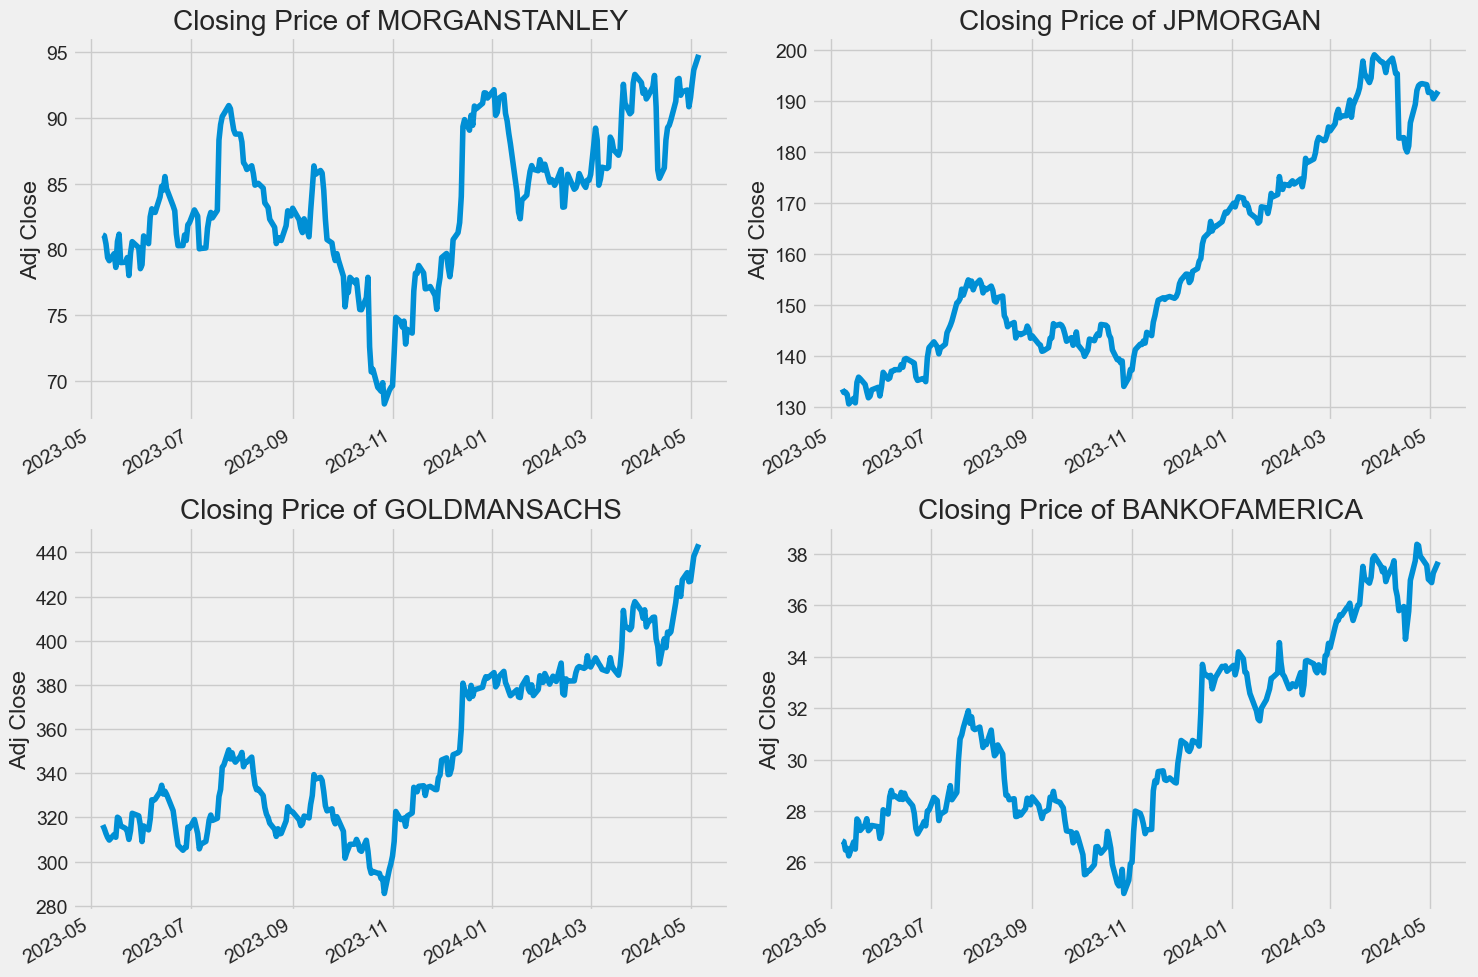

In [99]:
import matplotlib.pyplot as plt

# Recreate the bank_list if not already defined:
bank_list = ['MS', 'JPM', 'GS', 'BAC']
company_names = ["MORGANSTANLEY", "JPMORGAN", "GOLDMANSACHS", "BANKOFAMERICA"]

# Assuming 'stock_data' dictionary from previous code exists:
# Create a company_list from 'stock_data' dictionary values
company_list = [stock_data[stock] for stock in bank_list]

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, (company, name) in enumerate(zip(company_list, company_names), 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {name}")
    
plt.tight_layout()
plt.show()


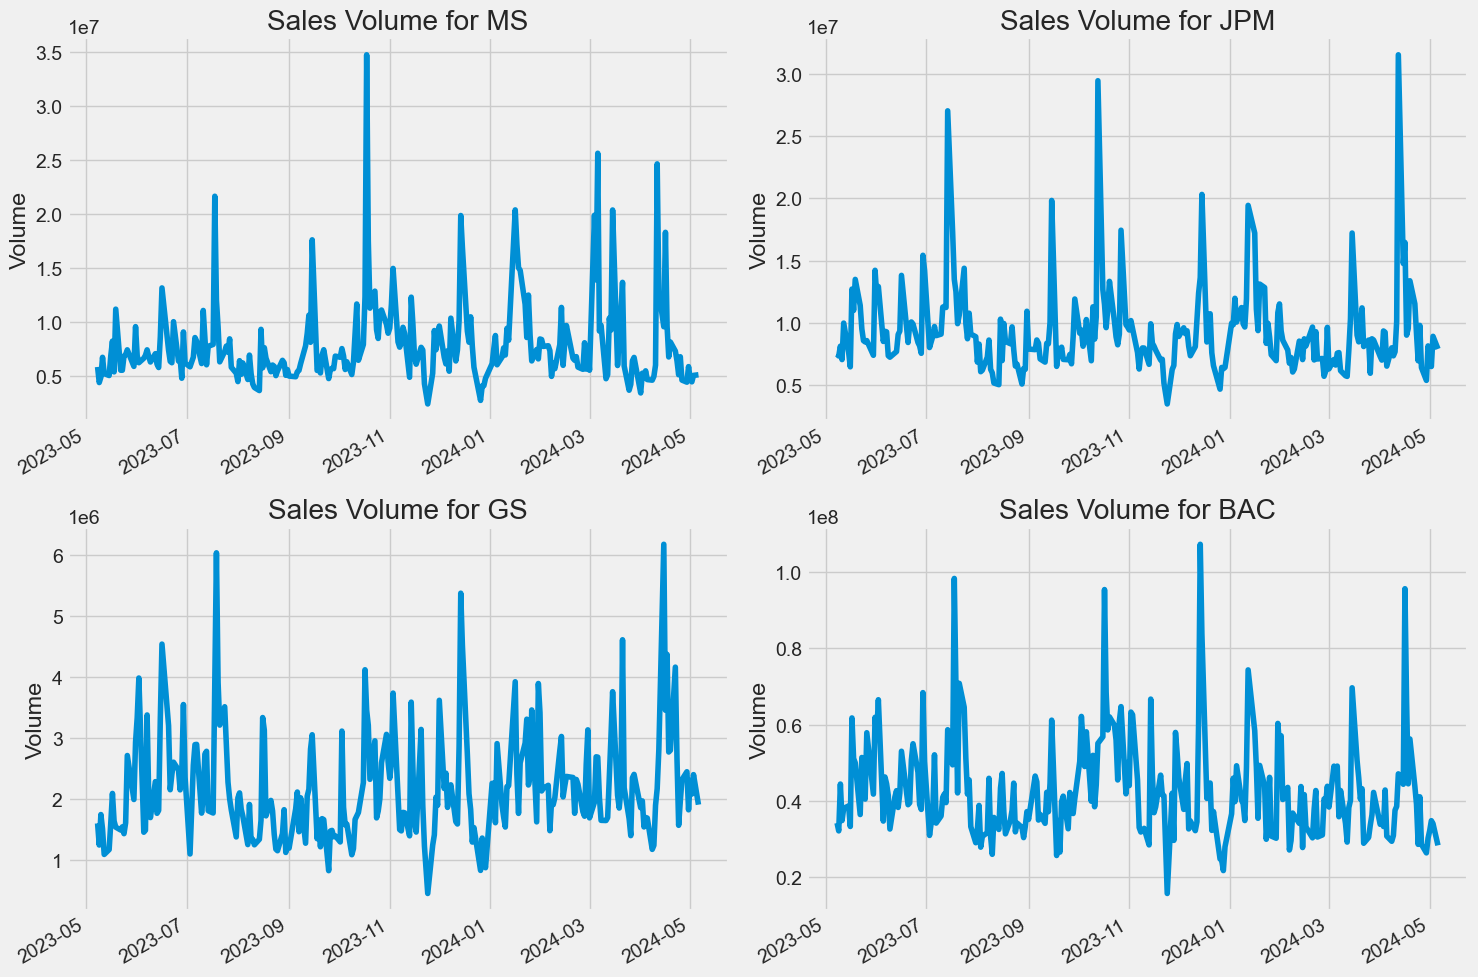

In [100]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {bank_list[i - 1]}")
    
plt.tight_layout()

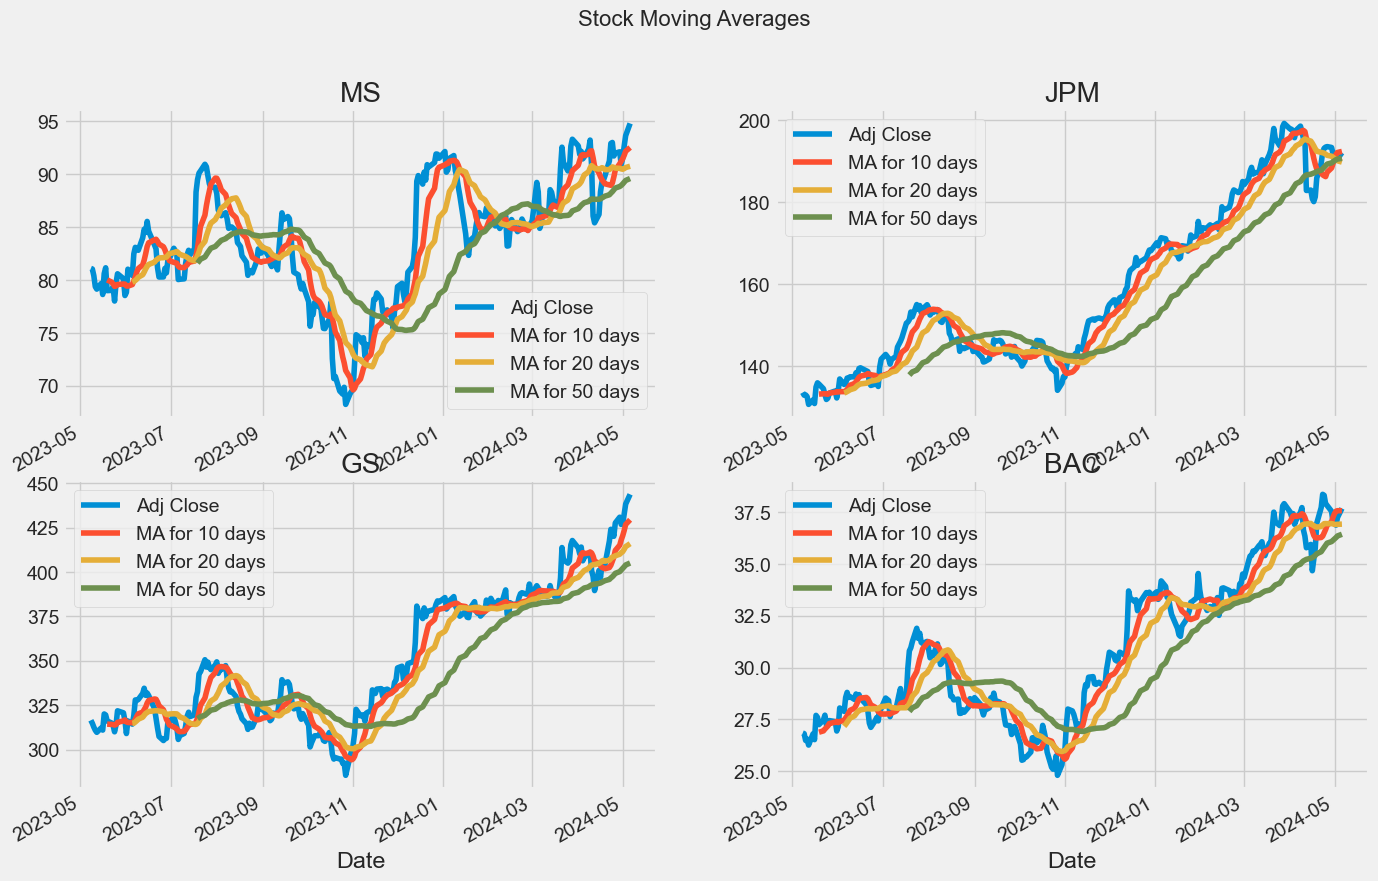

In [101]:
import matplotlib.pyplot as plt

# Re-create the company_list if not already done:
company_list = [MS, JPM, GS, BAC]  # Assuming these DataFrames exist

# Define the moving average days
ma_days = [10, 20, 50]

# Create moving average columns
for ma in ma_days:
    column_name = f"MA for {ma} days"
    for company in company_list:
        if 'Adj Close' in company.columns:
            company[column_name] = company['Adj Close'].rolling(ma).mean()

# Create a subplot for each DataFrame
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Stock Moving Averages', fontsize=16)

# List of DataFrames and names for labeling
companies = [("MS", MS), ("JPM", JPM), ("GS", GS), ("BAC", BAC)]

# Plot each company's data in a subplot
for ax, (symbol, data) in zip(axes.flatten(), companies):
    columns_to_plot = ['Adj Close'] + [f'MA for {ma} days' for ma in ma_days]
    data[columns_to_plot].plot(ax=ax)
    ax.set_title(symbol)
    ax.set_xlabel('Date')
    ax.set_ylabel


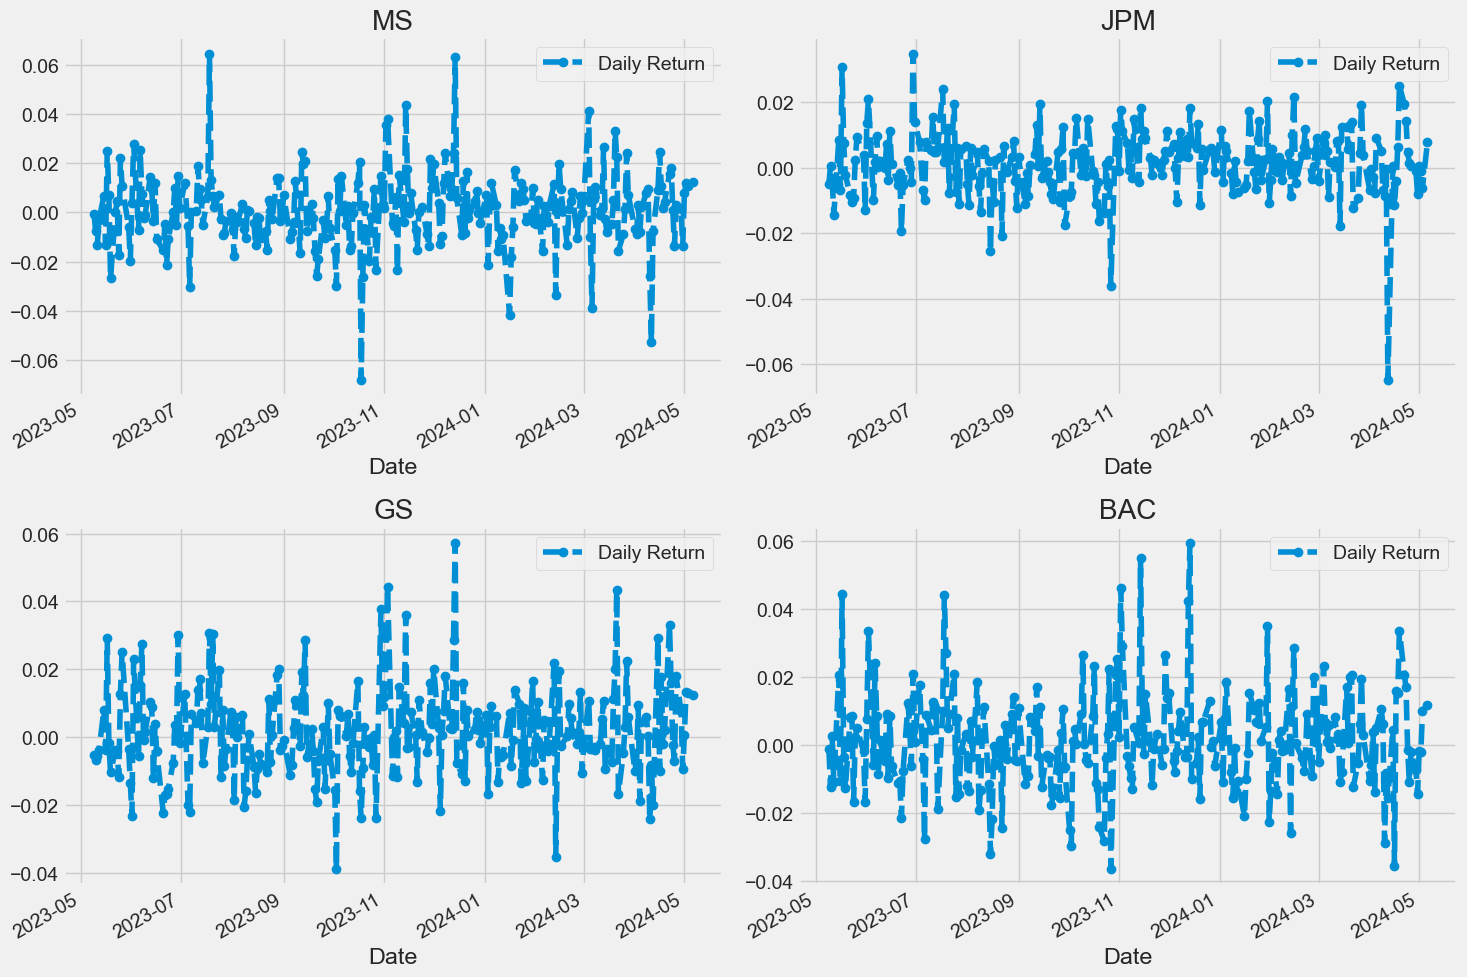

In [102]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

MS['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('MS')

JPM['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('JPM')

GS['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('GS')

BAC['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('BAC')

fig.tight_layout()

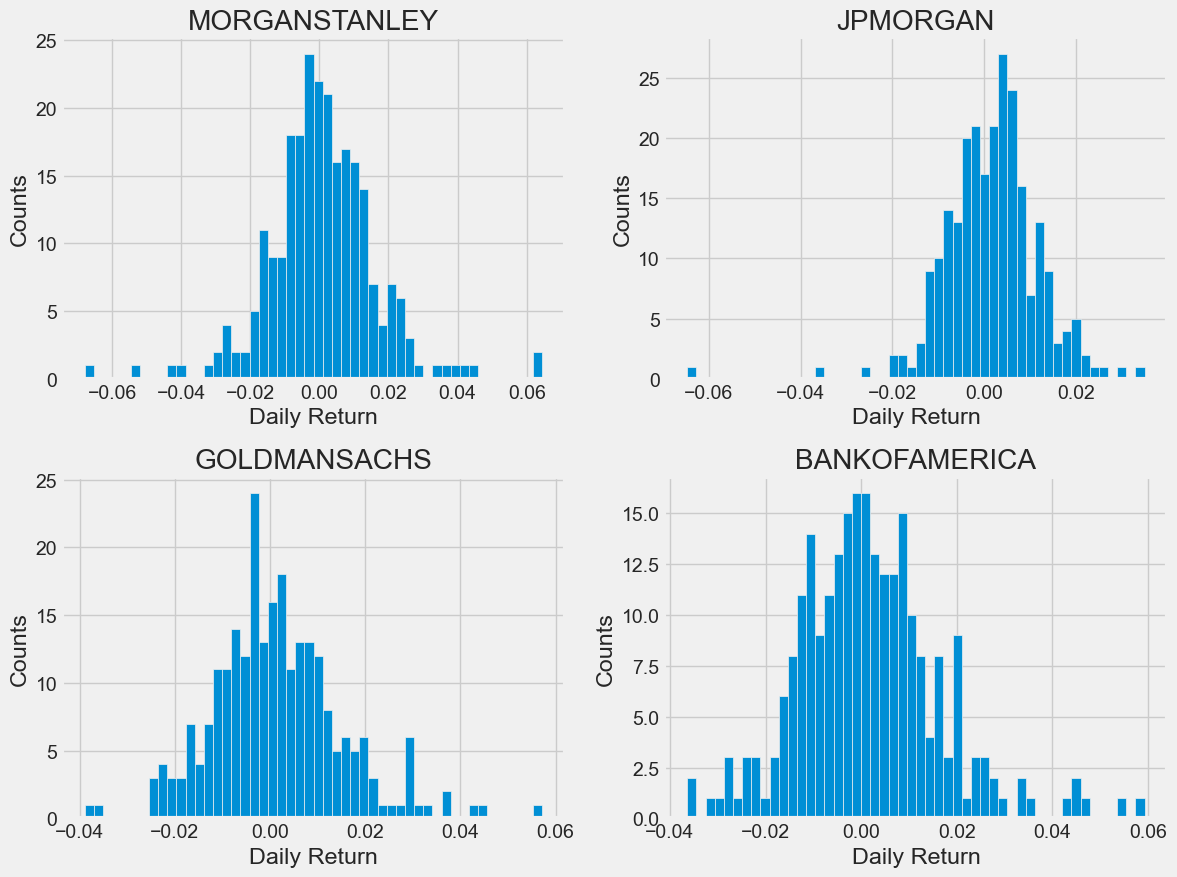

In [103]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [104]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(bank_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
bank_rets = closing_df.pct_change()
bank_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,BAC,GS,JPM,MS
Date,,,,
2023-05-08,NaN,NaN,NaN,NaN
2023-05-09,-0.001084,-0.005329,-0.004815,-0.000711
2023-05-10,-0.012292,-0.006835,0.000513,-0.007704
2023-05-11,0.002562,-0.005674,-0.003151,-0.013020
2023-05-12,-0.010953,-0.003804,-0.014333,-0.002904


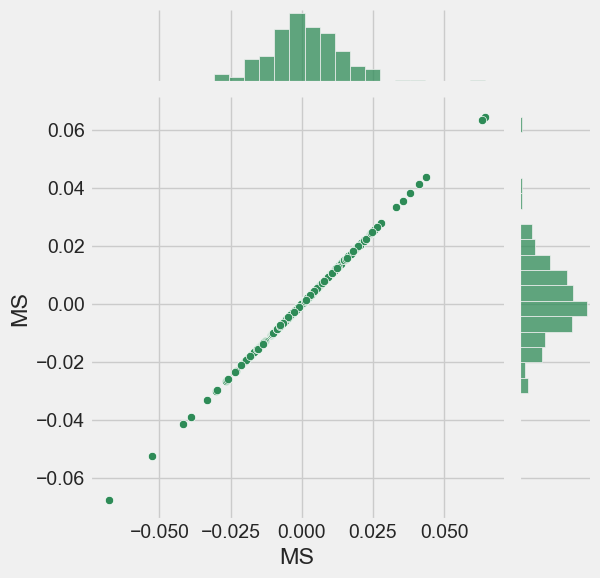

In [105]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='MS', y='MS', data=bank_rets, kind='scatter', color='seagreen')

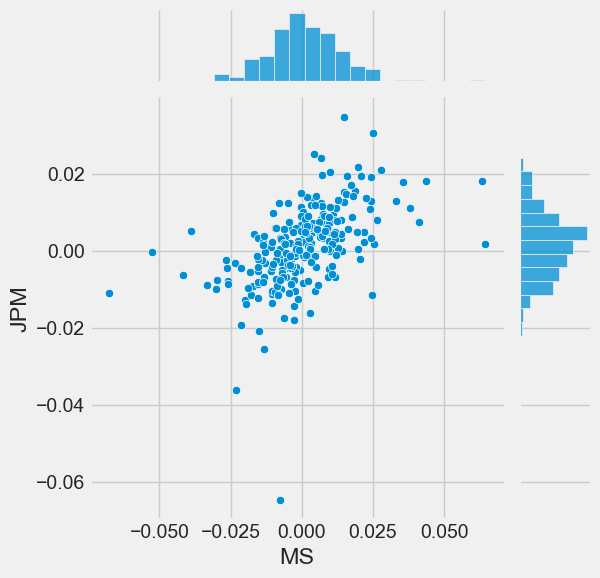

In [106]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='MS', y='JPM', data=bank_rets, kind='scatter')

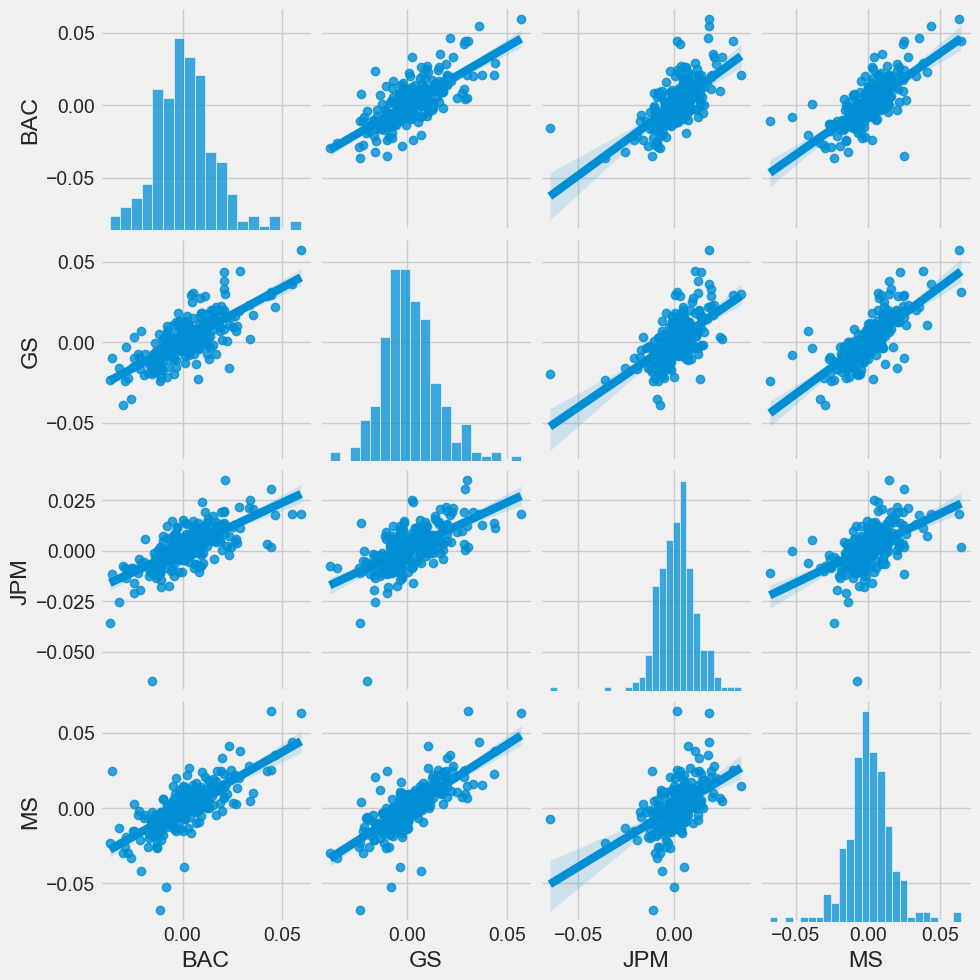

In [107]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(bank_rets, kind='reg')

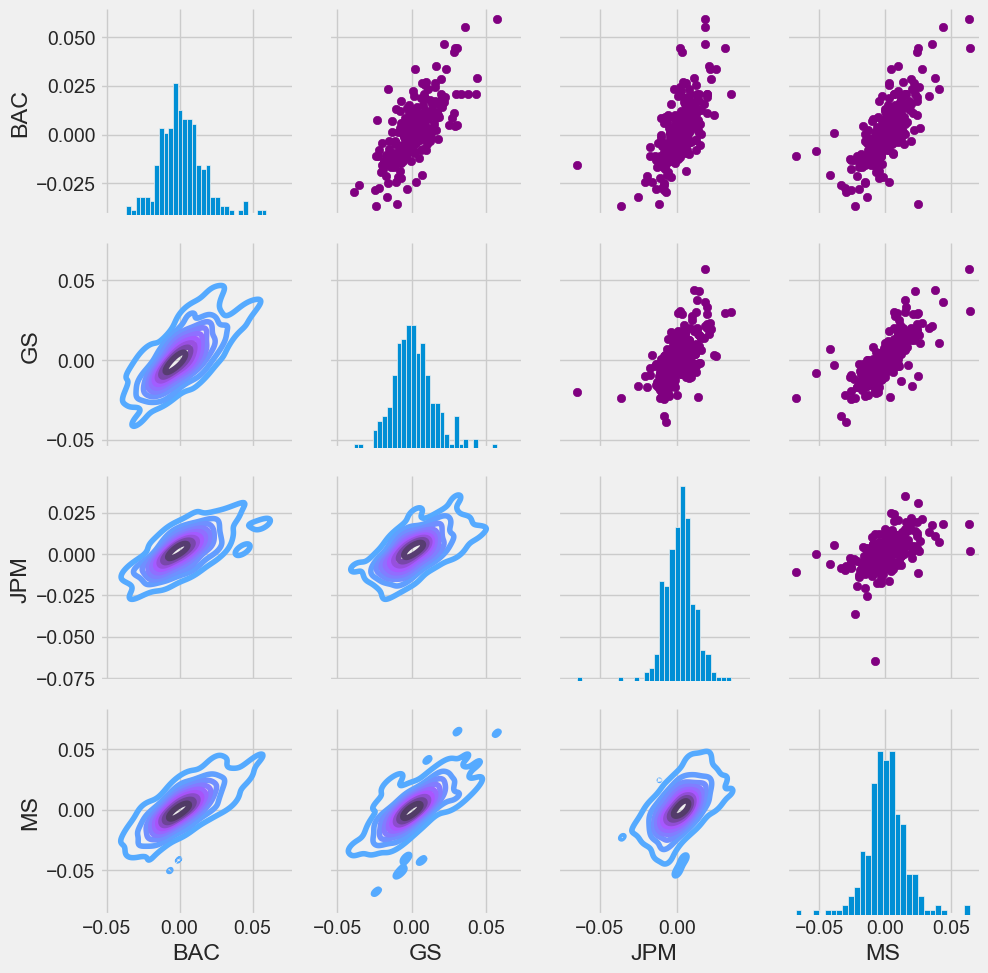

In [108]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(bank_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

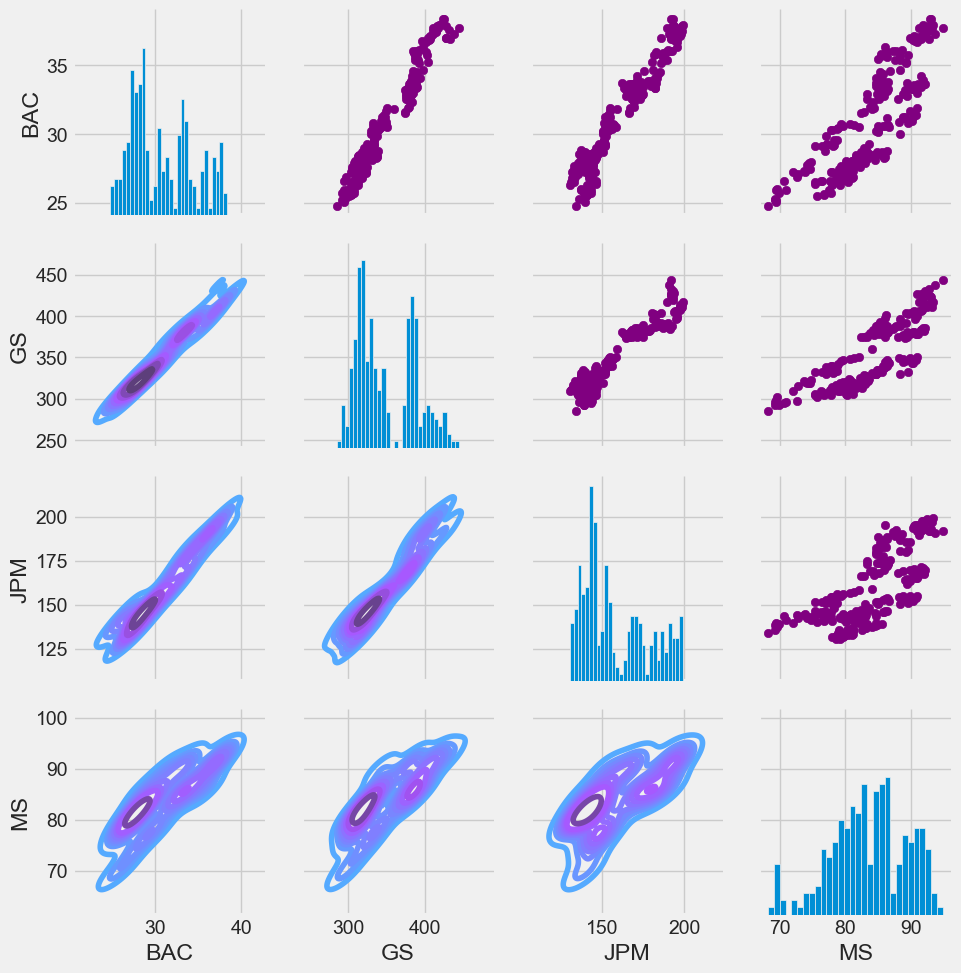

In [109]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

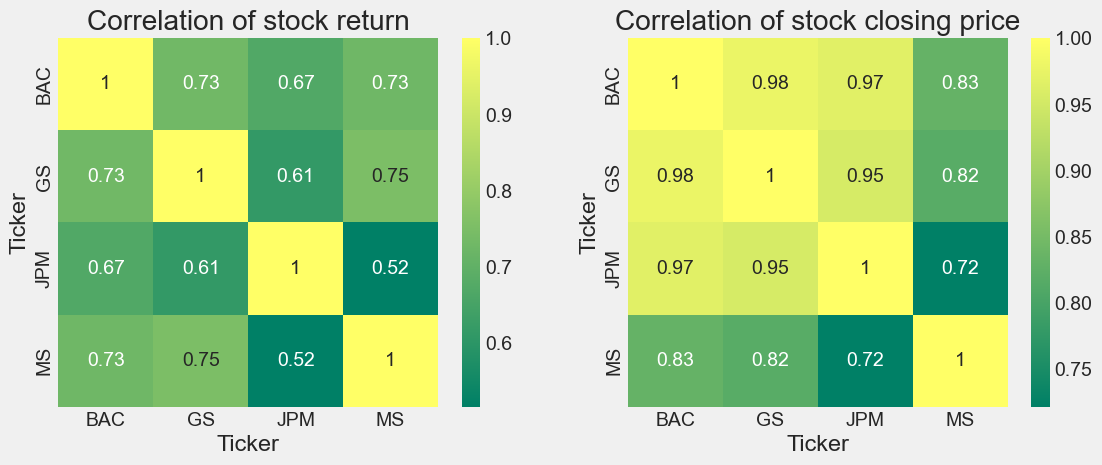

In [110]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(bank_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

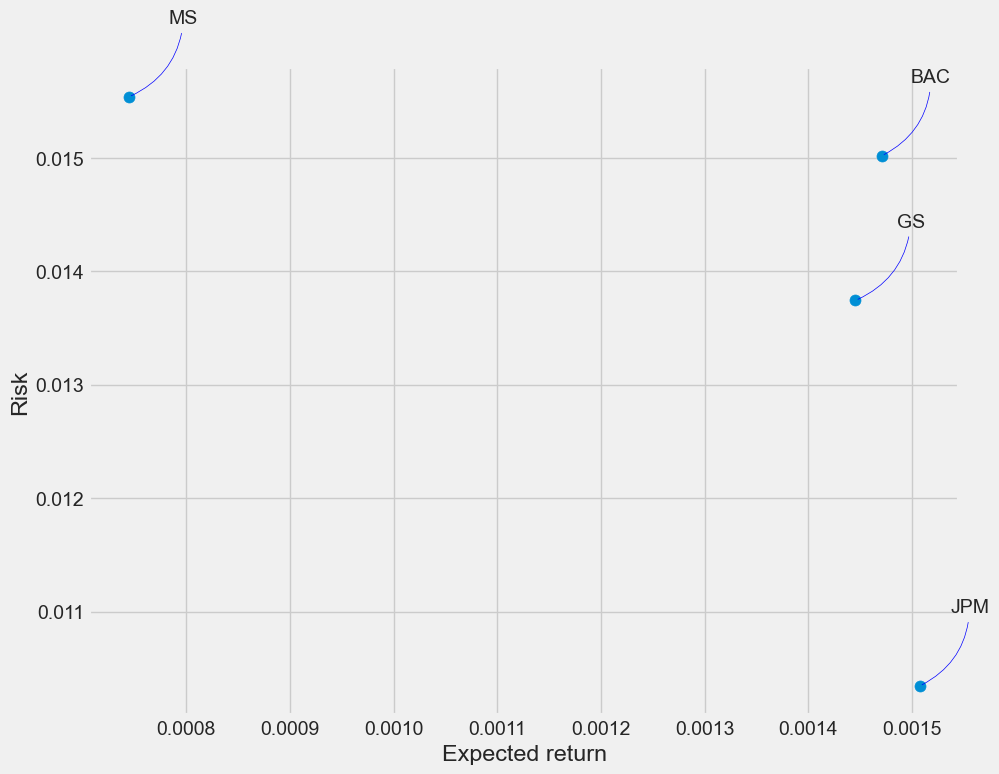

In [111]:
rets = bank_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [112]:
# Get the stock quote
df = pdr.get_data_yahoo('MS', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,15.760000,16.290001,15.710000,16.080000,12.084954,25777400
2012-01-04,15.750000,16.080000,15.500000,15.940000,11.979733,20699600
2012-01-05,15.590000,16.400000,15.430000,16.280001,12.235260,30615100
2012-01-06,16.080000,16.250000,15.800000,15.900000,11.949675,21677700
2012-01-09,16.000000,16.450001,15.930000,16.200001,12.175140,19102900
...,...,...,...,...,...,...
2024-04-30,91.599998,91.830002,90.550003,90.839996,90.839996,5860000
2024-05-01,91.279999,92.480003,90.730003,91.540001,91.540001,4713600
2024-05-02,92.540001,92.919998,91.599998,92.650002,92.650002,4449200


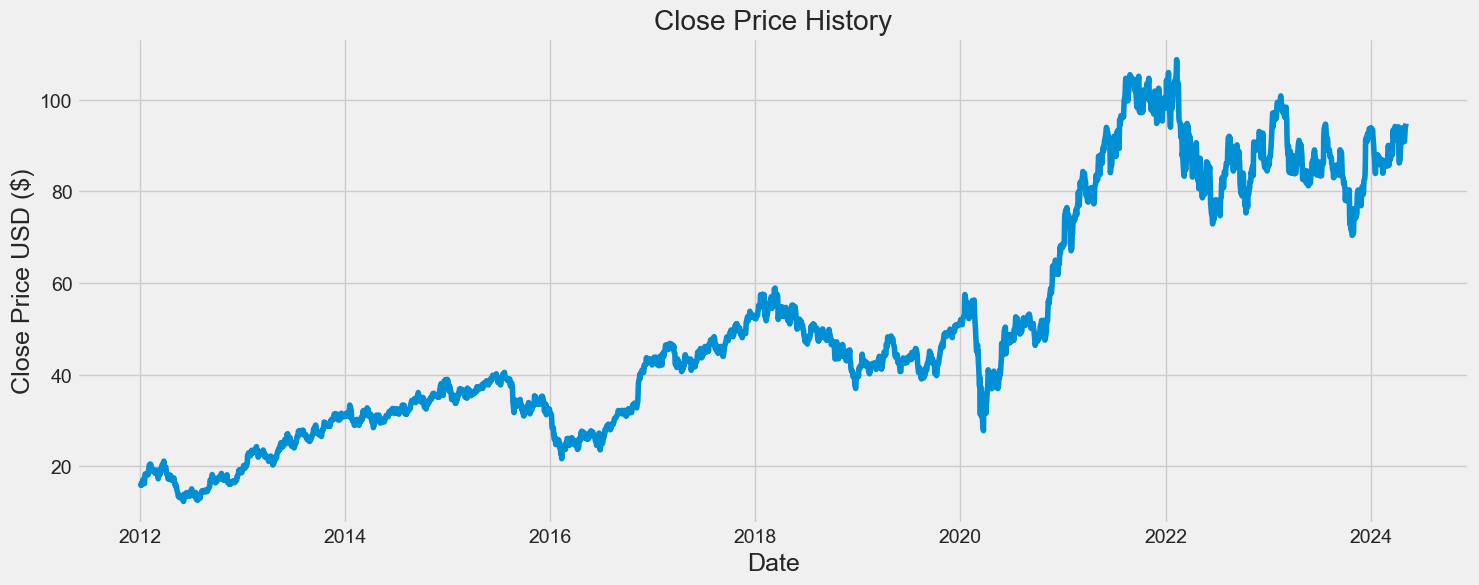

In [113]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [114]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2950

In [115]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03860123],
       [0.03714849],
       [0.04067657],
       ...,
       [0.83314308],
       [0.84341597],
       [0.85534916]])

In [116]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.03860123, 0.03714849, 0.04067657, 0.03673342, 0.03984644,
       0.04700633, 0.04918544, 0.0499118 , 0.04430839, 0.04036526,
       0.0517796 , 0.06142991, 0.06257133, 0.06070353, 0.05997717,
       0.0598734 , 0.06059978, 0.06433537, 0.06059978, 0.06526927,
       0.07294801, 0.07429699, 0.08249455, 0.08456989, 0.08197572,
       0.08384353, 0.08280585, 0.07574971, 0.07450452, 0.06941994,
       0.06848603, 0.07087268, 0.07056138, 0.07159905, 0.0660994 ,
       0.0685898 , 0.06360901, 0.06630694, 0.06589187, 0.06412785,
       0.07087268, 0.06755215, 0.06153368, 0.0514683 , 0.05727923,
       0.06039224, 0.06236382, 0.06059978, 0.06817475, 0.06475045,
       0.07419322, 0.07440075, 0.07990038, 0.08353222, 0.07990038,
       0.07502335, 0.08270209, 0.09141849, 0.08674898, 0.08176818])]
[0.07657984674770005]

[array([0.03860123, 0.03714849, 0.04067657, 0.03673342, 0.03984644,
       0.04700633, 0.04918544, 0.0499118 , 0.04430839, 0.04036526,
       0.0517796 , 0.06142991, 0.06

In [117]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2890/2890 ━━━━━━━━━━━━━━━━━━━━ 47s 16ms/step - loss: 0.0027


In [118]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step


2.2783819703278225

/var/folders/yd/ldh80xv91y70wl7n4tq7_lpw0000gn/T/ipykernel_4331/2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


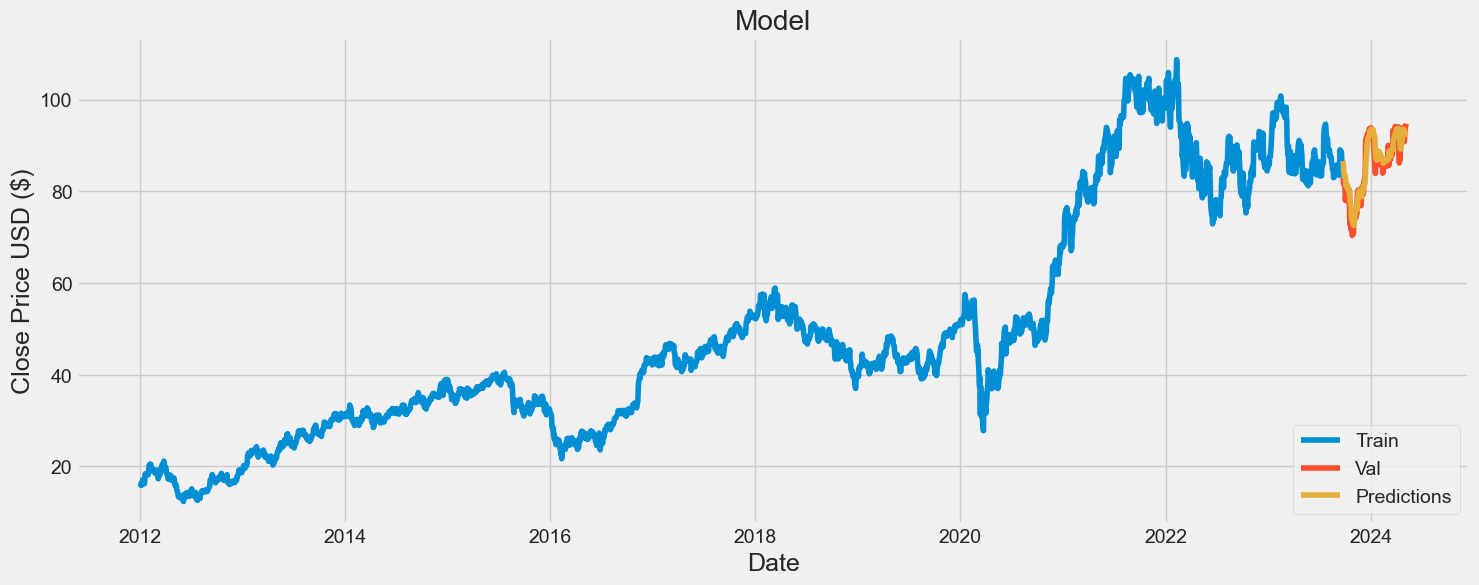

In [119]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [120]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-09-25,83.029999,86.640915
2023-09-26,82.169998,85.608109
2023-09-27,81.650002,84.714027
2023-09-28,82.190002,83.998329
2023-09-29,81.669998,83.677681
...,...,...
2024-04-30,90.839996,93.270836
2024-05-01,91.540001,92.709770
2024-05-02,92.650002,92.402138
